In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
savedir = "saved_models/"

In [4]:
beta = np.load("data/beta.npy")
Nbeta = len(beta)

In [7]:
vars_by_beta = [np.load(savedir+'variables_beta_indx_{0}.npy'.format(ii)) for ii in range(Nbeta)]

In [13]:
weights_by_beta = [v[-1]['weights'] for v in vars_by_beta]

In [14]:
weights_by_beta[0].shape

(50, 25)

### Look at the trained weights

In [44]:
plt.rc('text', usetex=True)

In [46]:
plt.rc('font',family='serif')
plt.rc('font',serif=[])

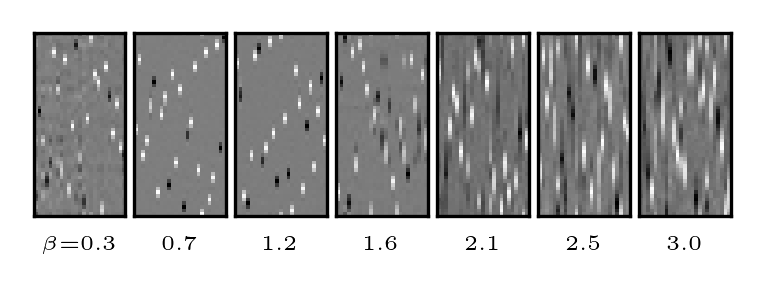

In [71]:
cmap='binary'
beta_indices = list(range(1, Nbeta, 3))
Nplot = len(beta_indices)

fig, axes = plt.subplots(1, Nplot, figsize=(3,3),dpi=300)

for ii in range(Nplot):
    ax = axes[ii]
    bi = beta_indices[ii]
    w=(weights_by_beta[bi])
    ax.imshow(w, origin='lower',cmap=cmap)
    label = "{0:.1f}".format(beta[bi])
    if ii == 0:
        label = r"$\beta$=" + label
    ax.set_xlabel(label,fontsize=5)
    ax.set_xticks([])
    ax.set_yticks([])
#     ax.set_axis_off()
plt.subplots_adjust(wspace=0.1, hspace=0.0)
fig.savefig(savedir+"weights_examples.png")

In [98]:
w=(weights_by_beta[10])

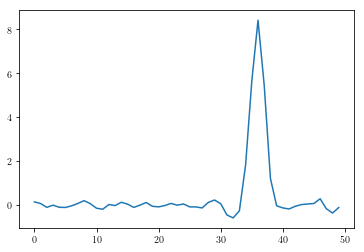

In [99]:
plt.plot(w[:,1])

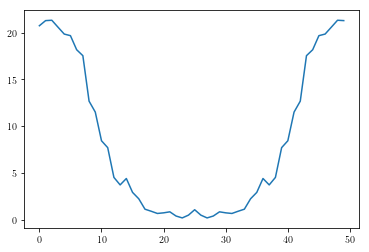

In [100]:
plt.plot(np.abs(np.fft.fft(w[:,1])))